In [234]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [235]:
import matplotlib
import matplotlib as mpl

plt.rcParams.update(
    {
        "font.size": 10,
        "text.usetex": True,
        "text.latex.preamble": r"\usepackage{amsfonts}\usepackage{bm}",
    }
)
mpl.rc("font", family="Times New Roman")
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42
plt.rcParams["figure.figsize"] = (16, 9)
fontsize = 22
matplotlib.rcParams.update({"font.size": fontsize})


In [236]:
# Get all file names in current folder
files = os.listdir(".")

In [237]:
# Concatenate all dataframes in a single one
df = pd.concat([pd.read_csv(f) for f in files if f.endswith(".csv")])
df = df.drop(columns=["dataset"])

In [238]:
models = df["method"].unique()
models = ["fmgp", "valla", "lla last_layer full", "lla last_layer kron", "ella"]
labels = ["FMGP", "VaLLA", "LLA*", "LLA* KFAC", "ELLA"]
jet = matplotlib.colormaps["Set2"]
colors = {
    "fmgp": jet(0),
    "valla": jet(1),
    "lla last_layer full": jet(2),
    "lla last_layer kron": jet(3),
    "ella": jet(4),
}

print("Models: ", models)

Models:  ['fmgp', 'valla', 'lla last_layer full', 'lla last_layer kron', 'ella']


In [239]:
def std(x):
    return np.std(x)

In [240]:
# Group by "method" and "resnet" and compute average and std
df = df.groupby(["method"]).agg(["mean", std])
df

RMSE            NLL                   Q-10  \
                          mean  std      mean           std     mean   
method                                                                 
ella                 38.902978  0.0  5.086775  5.119732e-07  0.13420   
fmgp                 38.902978  0.0  4.926038  3.220060e-14  0.09501   
lla last_layer full  38.902978  0.0  5.097362  4.586609e-09  0.12768   
lla last_layer kron  38.902978  0.0  5.097363  2.251736e-08  0.12768   
map                  38.902978  0.0  5.086787  0.000000e+00  0.13420   
valla                38.902978  0.0  4.934249  5.554702e-04  0.10573   

                                   Q-20               Q-30                ...  \
                          std      mean       std     mean           std  ...   
method                                                                    ...   
ella                 0.000000  0.275650  0.000000  0.42212  5.551115e-17  ...   
fmgp                 0.000000  0.195160  0.000000  0.30782  0.000000e+00  ...   
lla last_layer full  0.000000  0.261660  0.000000  0.40333  5.551115e-17  ...   
lla last_layer kron  0.000000  0.261660  0.000000  0.40333  5.551115e-17  ...   
map                  0.000000  0.275630  0.000000  0.42211  0.000000e+00  ...   
valla                0.000188  0.216882  0.000517  0.34556  7.915807e-04  ...   

                       train_time               test_time             \
                             mean         std        mean        std   
method                                                                 
ella                  8885.148894  850.471009   80.939409   5.783420   
fmgp                   918.706687  126.237235    7.593059   0.972088   
lla last_layer full     29.377069    5.176054   10.745614   1.439321   
lla last_layer kron     51.721480    9.345935    9.875528   1.116760   
map                     60.436228    3.175907    5.431705   0.314976   
valla                27342.665522  190.641831  294.691218  22.942399   

                    prior_precision               sigma_noise                \
                               mean           std        mean           std   
method                                                                        
ella                       0.001000  0.000000e+00    1.000000  0.000000e+00   
fmgp                            NaN           NaN         NaN           NaN   
lla last_layer full        6.364602  8.643257e-06    0.954800  5.840039e-08   
lla last_layer kron        7.741396  7.629395e-07    0.954797  2.384186e-08   
map                             NaN           NaN    1.000000  0.000000e+00   
valla                           NaN           NaN         NaN           NaN   

                    seed            
                    mean       std  
method                              
ella                 2.0  1.414214  
fmgp                 2.0  1.414214  
lla last_layer full  2.0  1.414214  
lla last_layer kron  2.0  1.414214  
map                  2.0  1.414214  
valla                2.0  1.414214  

[6 rows x 36 columns]

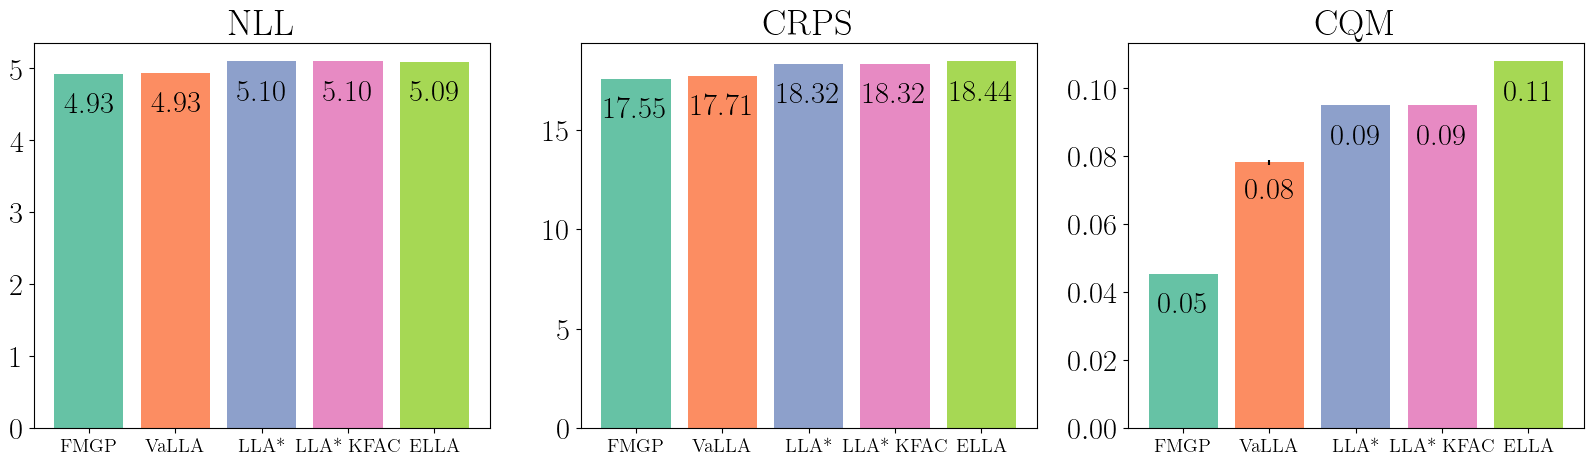

In [250]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))
# Plot NLL in axis 0
for j, model in enumerate(models):
    nll = df.loc[model, ("NLL", "mean")]
    std = df.loc[model, ("NLL", "std")]
    bar = axis[0].bar(j, nll, yerr=std, label=labels[j], color=colors[model])
    axis[0].set_title("NLL")
    axis[0].set_xticks(range(len(models)))
    axis[0].set_xticklabels(labels, fontsize=14)
    axis[0].bar_label(bar, padding=-32, fmt="%.2f", color="black")

    # Plot CRPS
    crps = df.loc[model, ("CRPS", "mean")]
    std = df.loc[model, ("CRPS", "std")]
    bar = axis[1].bar(j, crps, yerr=std, label=labels[j], color=colors[model])
    axis[1].set_title("CRPS")
    axis[1].set_xticks(range(len(models)))
    axis[1].set_xticklabels(labels, fontsize=14)
    axis[1].bar_label(bar, padding=-32, fmt="%.2f", color="black")

    # Plot Q
    q = df.loc[model, ("CQM", "mean")]
    std = df.loc[model, ("CQM", "std")]
    bar = axis[2].bar(j, q, yerr=std, label=labels[j], color=colors[model])
    axis[2].set_title("CQM")
    axis[2].set_xticks(range(len(models)))
    axis[2].set_xticklabels(labels, fontsize=14)
    axis[2].bar_label(bar, padding=-32, fmt="%.2f", color="black")

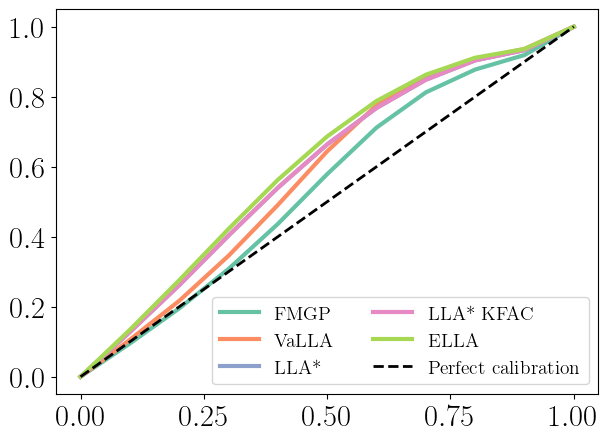

In [242]:
# Get Q-10, Q-20.. columns in array
fig, axis = plt.subplots(1, 1, figsize=(7, 5))
for i, model in enumerate(models):
    Q = []
    Q_std = []
    for q in range(10, 100, 10):
        q = f"Q-{q}"
        q_values = df.loc[model, (q, "mean")]
        Q.append(q_values)
        q_std = df.loc[model, (q, "std")]
        Q_std.append(q_std)
    axis.plot(
        np.arange(0, 1.1, 0.1),
        [0, *Q, 1],
        label=labels[i],
        linewidth=3,
        color=colors[model],
    )
    axis.fill_between(
        np.arange(0, 1.1, 0.1),
        [0, *Q, 1],
        [0, *(np.array(Q) - np.array(Q_std)), 1],
        alpha=0.2,
    )
axis.plot(
    np.arange(0, 1.1, 0.1),
    np.arange(0, 1.1, 0.1),
    label="Perfect calibration",
    linestyle="--",
    color="black",
    linewidth=2,
)
# legend with two columns
axis.legend(ncol=2, fontsize=14)


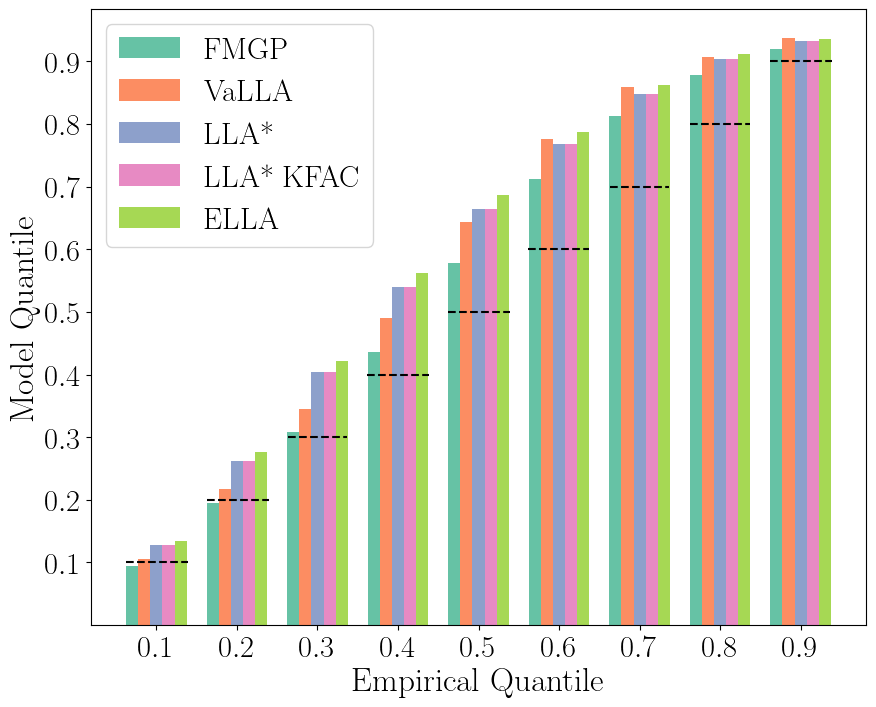

In [254]:
fig, axis = plt.subplots(1, 1, figsize=(10, 8))

# Get Q-10, Q-20.. columns in array
sep = 0.015
er = np.arange(-2, 3, 1) * sep
for i, model in enumerate(models):
    Q = []
    Q_std = []
    for q in range(10, 100, 10):
        q = f"Q-{q}"
        q_values = df.loc[model, (q, "mean")]
        Q.append(q_values)
        q_std = df.loc[model, (q, "std")]
        Q_std.append(q_std)
    b = axis.bar(
        np.arange(0.1, 1, 0.1) + er[i],
        Q,
        width=sep,
        label=labels[i],
        color=colors[model],
    )
axis.axhline(0.1, 0.045, 0.125, linestyle="--", color="black")
axis.axhline(0.2, 0.15, 0.23, linestyle="--", color="black")
axis.axhline(0.3, 0.254, 0.33, linestyle="--", color="black")
axis.axhline(0.4, 0.356, 0.436, linestyle="--", color="black")
axis.axhline(0.5, 0.46, 0.54, linestyle="--", color="black")
axis.axhline(0.6, 0.564, 0.643, linestyle="--", color="black")
axis.axhline(0.7, 0.67, 0.746, linestyle="--", color="black")
axis.axhline(0.8, 0.773, 0.85, linestyle="--", color="black")
axis.axhline(0.9, 0.876, 0.956, linestyle="--", color="black")
axis.set_xticks(np.arange(0.1, 1, 0.1))
axis.set_yticks(np.arange(0.1, 1, 0.1))

axis.set_xlabel("Empirical Quantile", fontsize=24)
axis.set_ylabel("Model Quantile", fontsize=24)

axis.legend()


In [244]:
# Concatenate all dataframes in a single one
nll = []
crps = []
Q = []
for i in range(5):
    nll.append(np.loadtxt(f"ella_{i}_nll.txt"))
    crps.append(np.loadtxt(f"ella_{i}_crps.txt"))
    Q.append(np.loadtxt(f"ella_{i}_cqm.txt"))
nll = np.array(nll)
crps = np.array(crps)
Q = np.array(Q)

nll_mean = np.mean(nll, axis=0)
nll_std = np.std(nll, axis=0) / np.sqrt(5)
crps_mean = np.mean(crps, axis=0)
crps_std = np.std(crps, axis=0) / np.sqrt(5)
Q_mean = np.mean(Q, axis=0)
Q_std = np.std(Q, axis=0) / np.sqrt(5)

In [245]:
evaluations = np.loadtxt("ella_0_evaluations.txt")


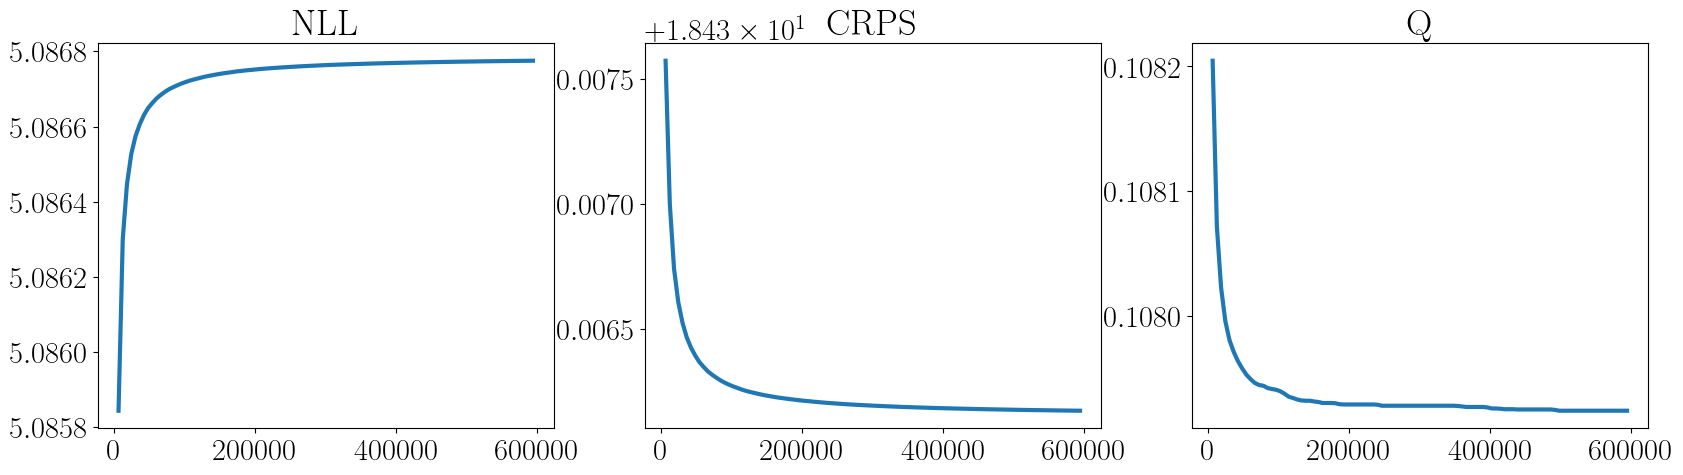

In [246]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))
axis[0].plot(evaluations[1:], nll_mean[1:], linewidth=3)
axis[0].set_title("NLL")

axis[1].plot(evaluations[1:], crps_mean[1:], linewidth=3)
axis[1].set_title("CRPS")

axis[2].plot(evaluations[1:], Q_mean[1:], linewidth=3)
axis[2].set_title("Q")

plt.show()